# **1. Introduction to Dataset**


This dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/488/facebook+live+sellers+in+thailand) contains information about Facebook Live sellers in Thailand. It captures various metrics related to live selling activities on Facebook, which is a popular e-commerce platform in Southeast Asia.

# **2. Import Library**

In [151]:
pip install ucimlrepo

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.manifold import TSNE
from ucimlrepo import fetch_ucirepo

# **3. Data Wrangling**

In [153]:
# fetch dataset
facebook_live_sellers_in_thailand = fetch_ucirepo(id=488)
df = facebook_live_sellers_in_thailand.data.features

In [154]:
df

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


# **4. Exploratory Data Analysis (EDA)**



In [155]:
def assess(df):
    print('Missing Value : ')
    print(df.isnull().sum())
    print('\n')

    print('Duplicate Value : ' , df.duplicated().sum())
    print('\n')

    print('Info Table : ')
    print(df.info())
    print('\n')

    print('Descriptive Statistics : ')
    print(df.describe(include = 'all'))
    print('\n')

In [156]:
assess(df)

Missing Value : 
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64


Duplicate Value :  54


Info Table : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       7050 non-null   object
 1   status_published  7050 non-null   object
 2   num_reactions     7050 non-null   int64 
 3   num_comments      7050 non-null   int64 
 4   num_shares        7050 non-null   int64 
 5   num_likes         7050 non-null   int64 
 6   num_loves         7050 non-null   int64 
 7   num_wows          7050 non-null   int64 
 8   num_hahas         7050 non-null   int64 
 9   num_sads          7050 non-null   int64 
 10  num_angrys        7050 n

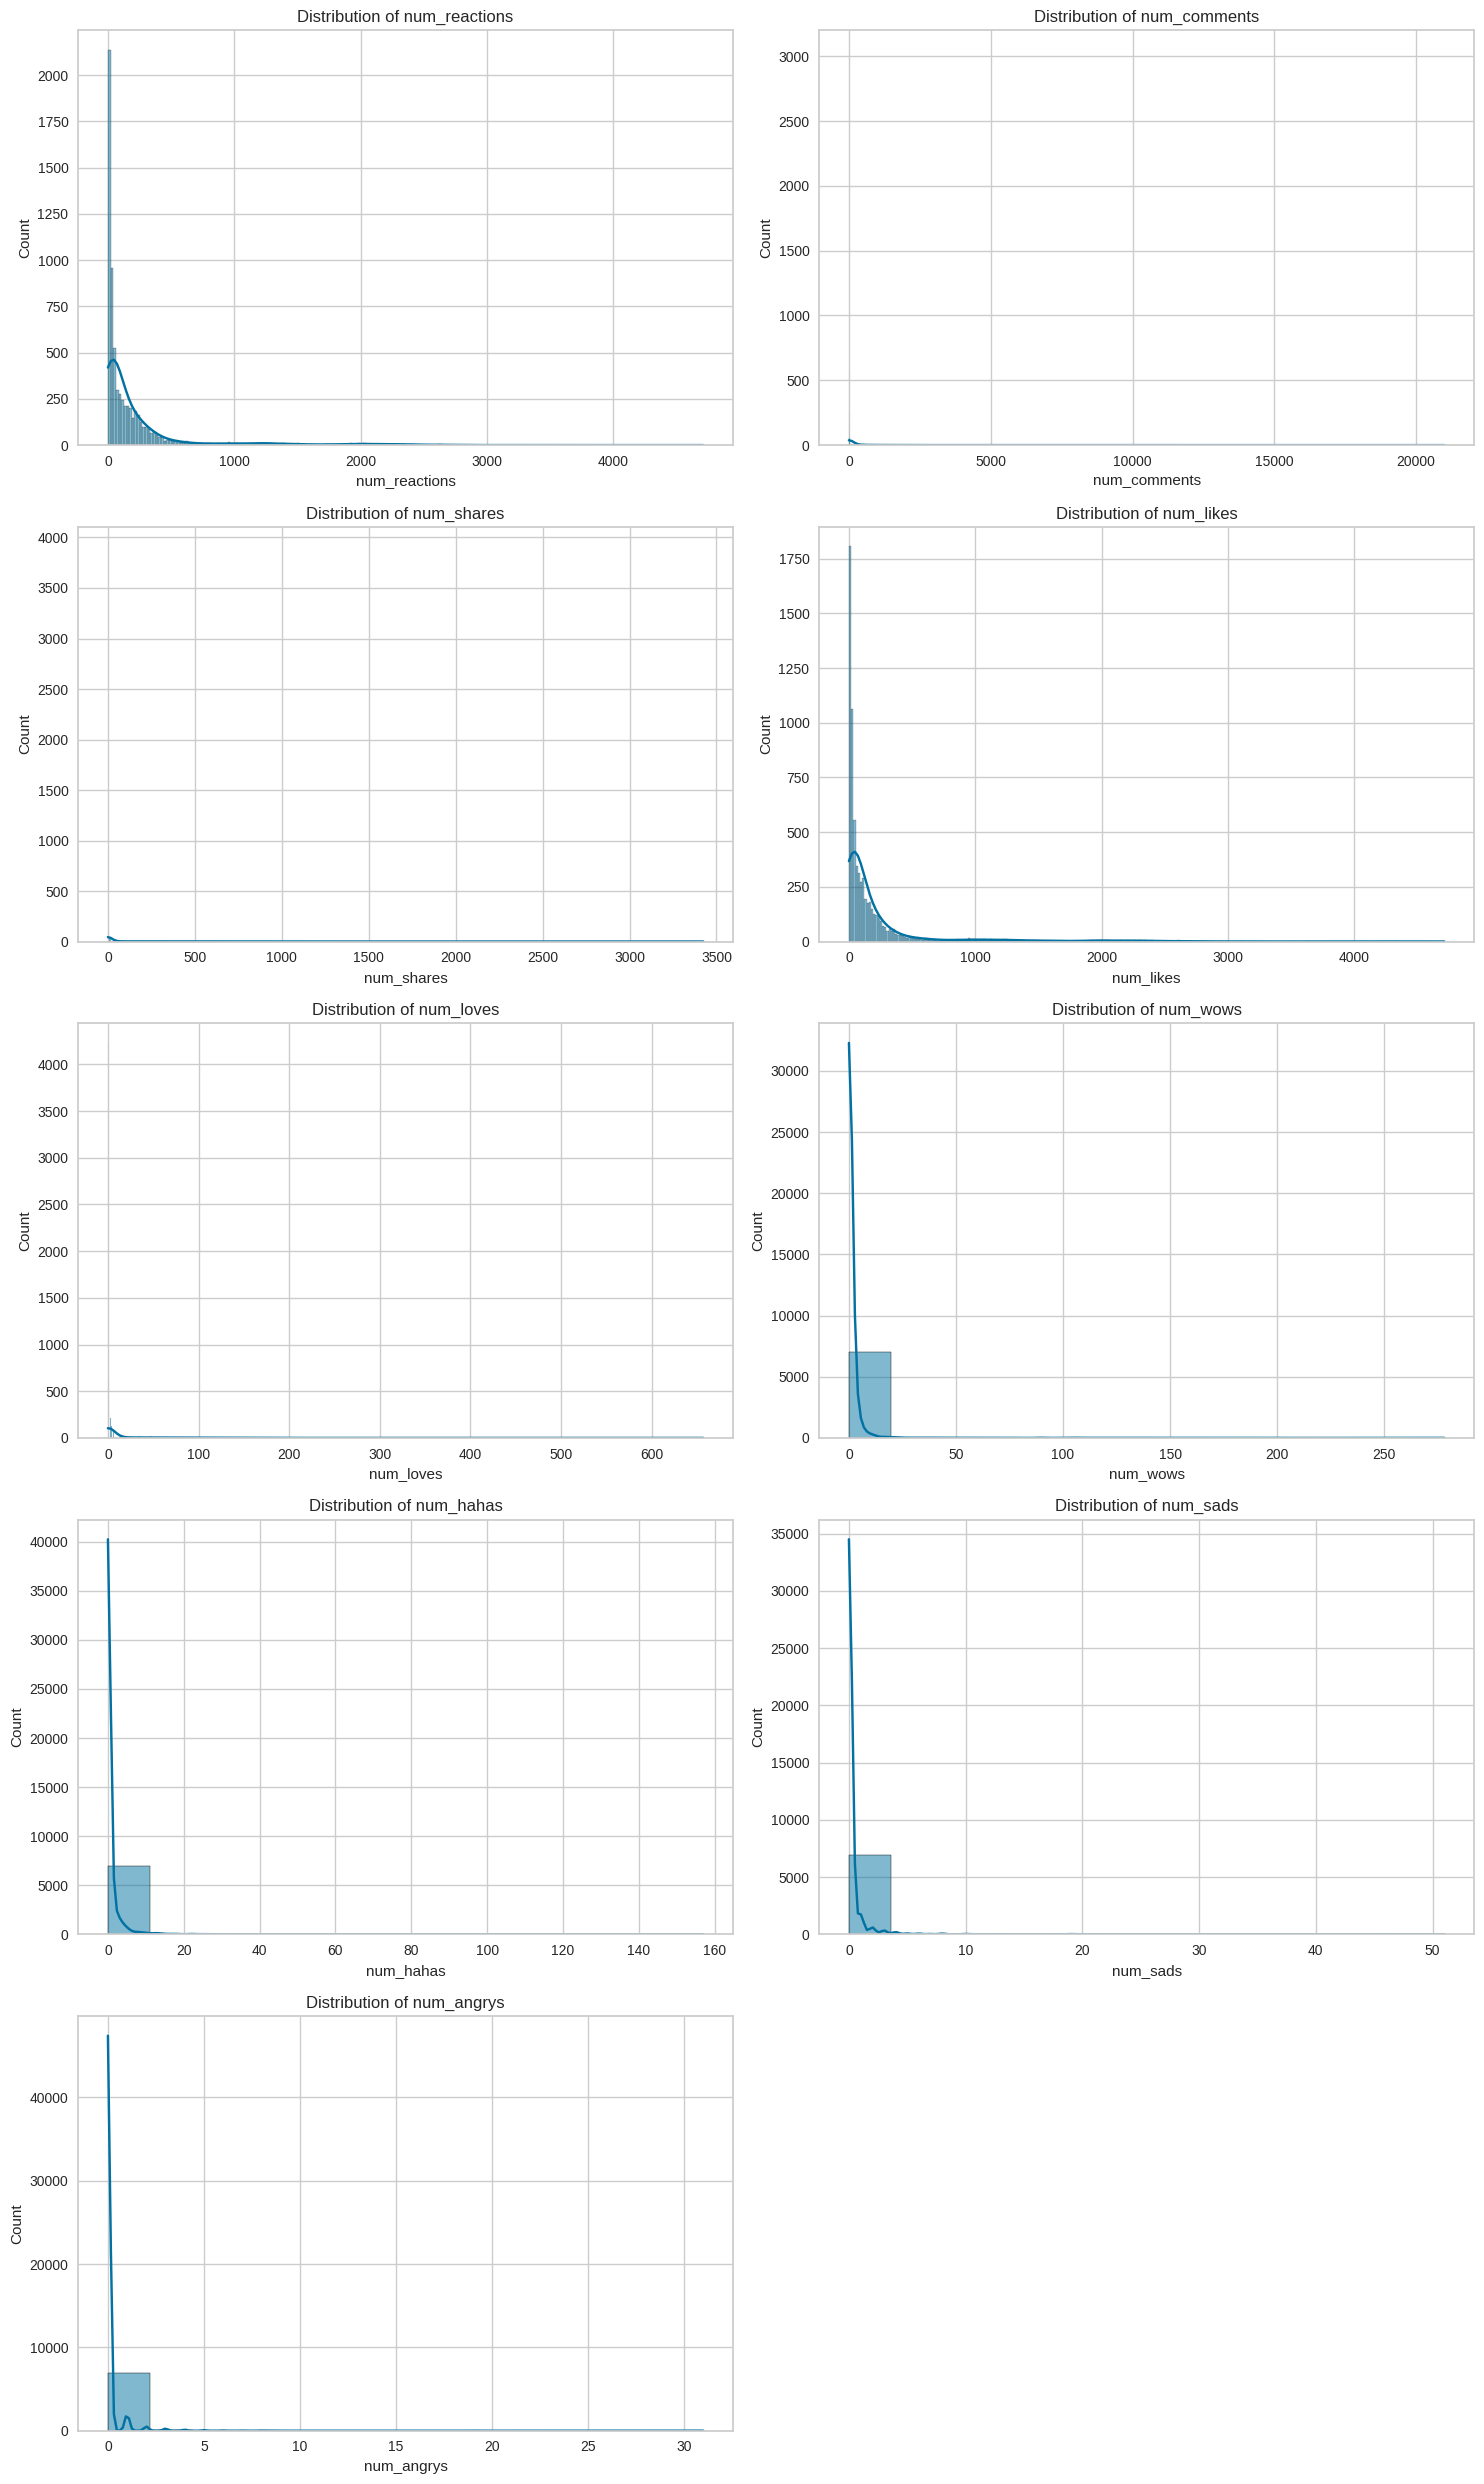

In [157]:
num_cols = df.select_dtypes(include=np.number).columns
num_plots = len(num_cols)
rows = (num_plots + 1) // 2

fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
  sns.histplot(df[col], kde=True, ax=axes[i])
  axes[i].set_title(f'Distribution of {col}')

for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

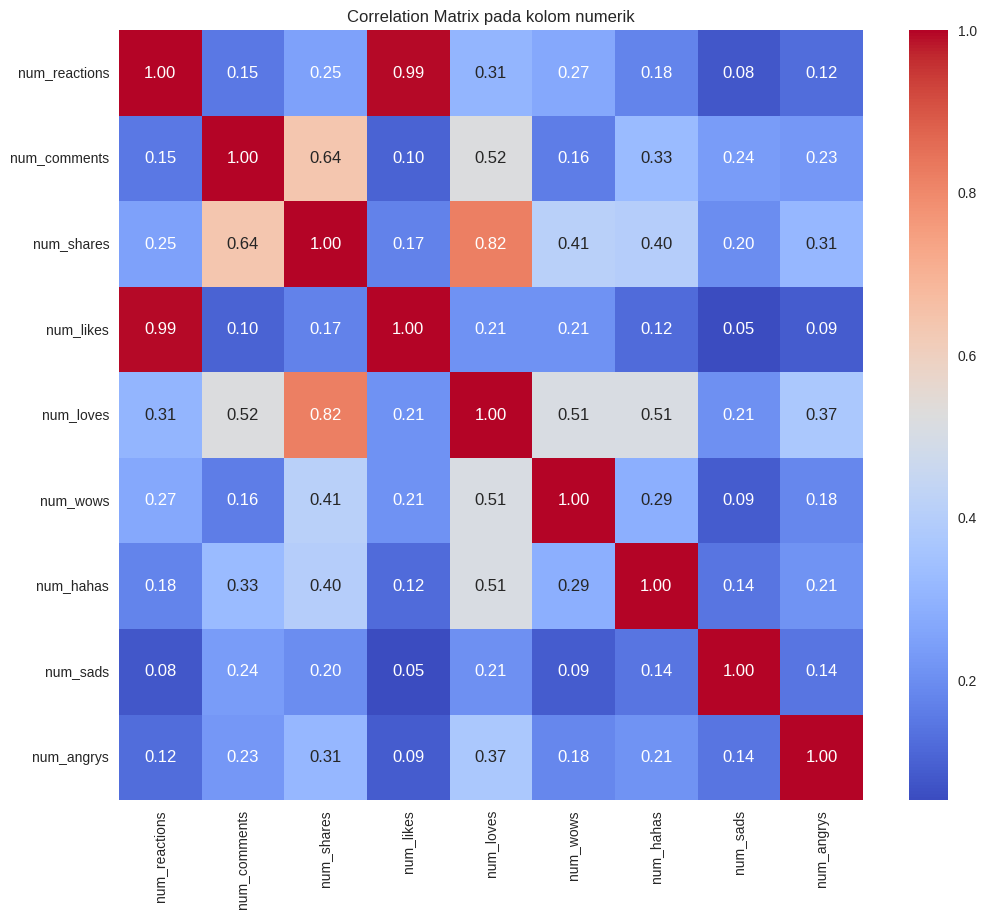

In [158]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix pada kolom numerik')
plt.show()

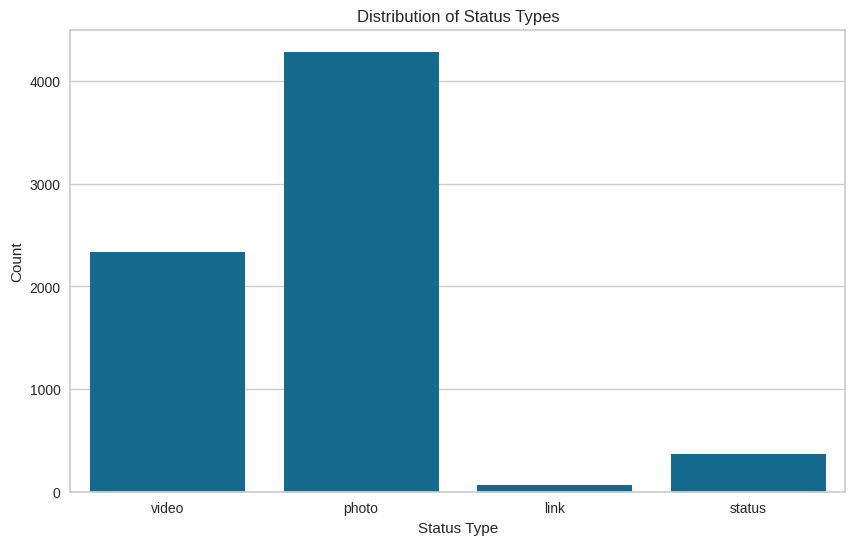

In [159]:
plt.figure(figsize=(10, 6))
sns.countplot(x='status_type', data=df)
plt.title('Distribution of Status Types')
plt.xlabel('Status Type')
plt.ylabel('Count')
plt.show()

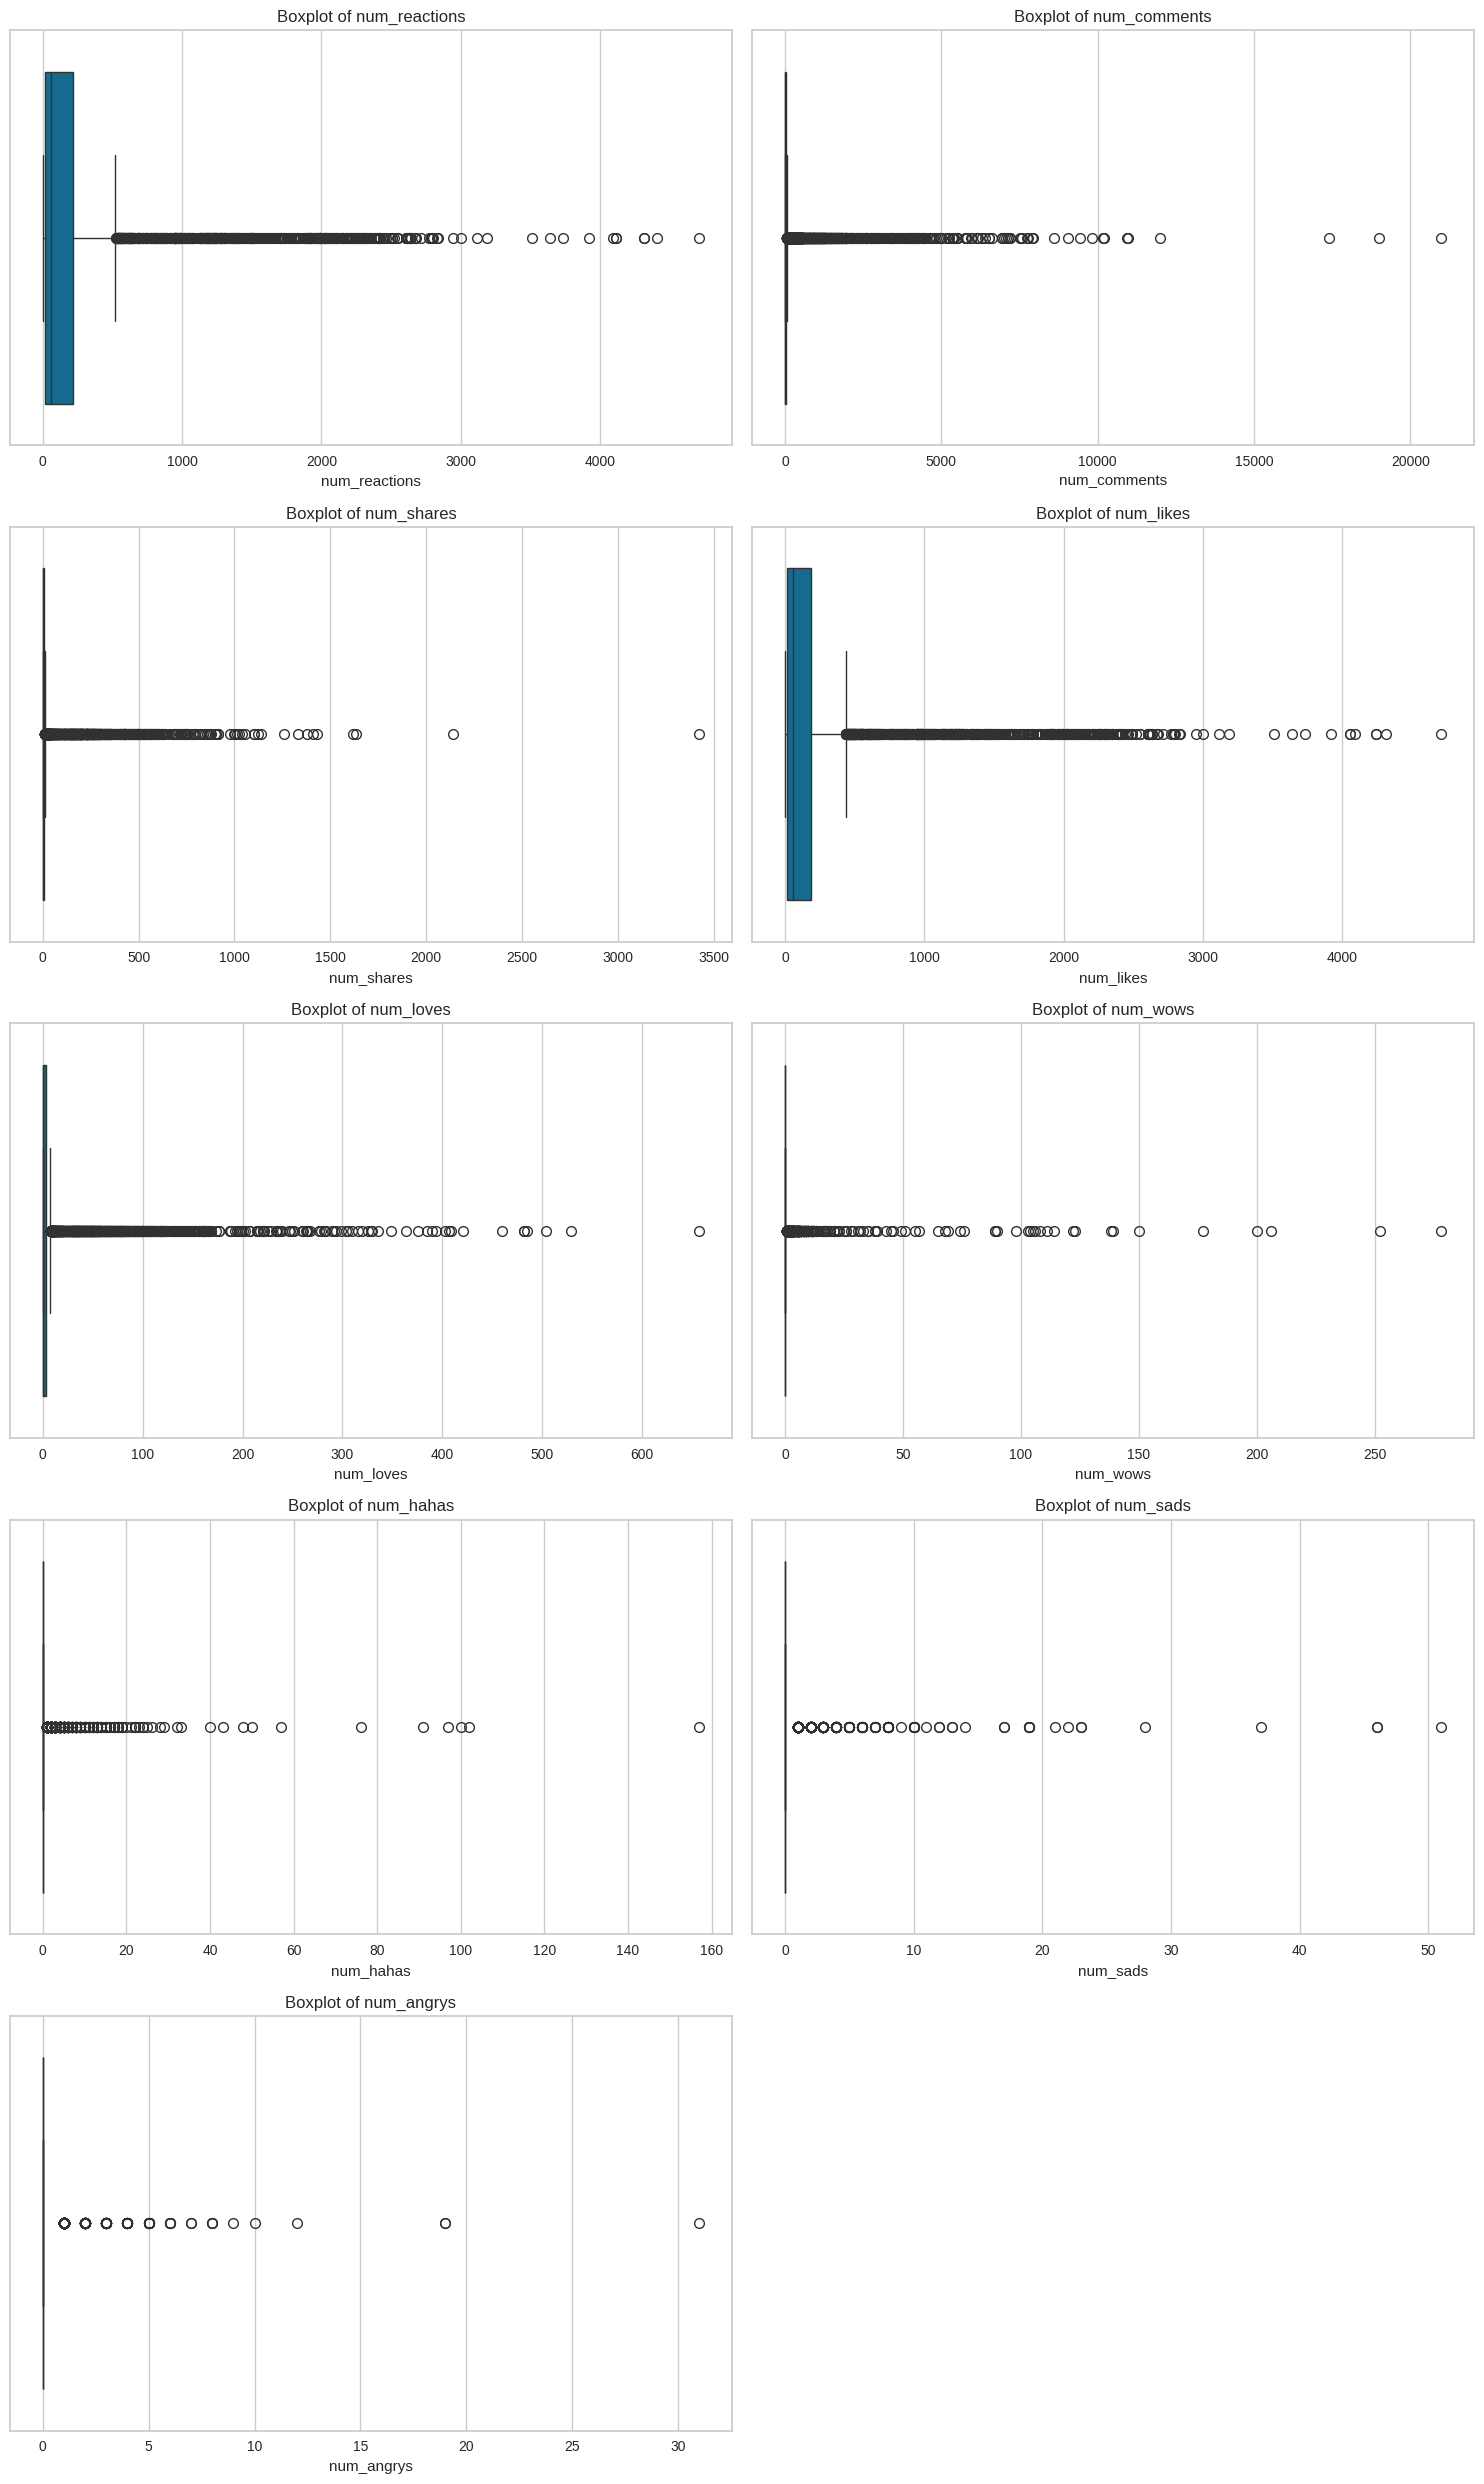

In [160]:
fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
  sns.boxplot(x=df[col], ax=axes[i])
  axes[i].set_title(f'Boxplot of {col}')

for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


# **5. Data Preprocessing**

In [161]:
numerical_cols = df.select_dtypes(include=np.number).columns

In [162]:
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [163]:
df

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,photo,4/21/2018 22:45,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,video,4/21/2018 6:17,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,photo,4/21/2018 2:29,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,photo,4/18/2018 3:22,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,9/24/2016 2:58,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
7046,photo,9/23/2016 11:19,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
7047,photo,9/21/2016 23:03,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
7048,photo,9/20/2016 0:43,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


In [164]:
df = pd.get_dummies(df, columns=['status_type'], prefix=['status_type'], dtype=np.float64)
df

,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,4/22/2018 6:00,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,4/21/2018 22:45,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,4/21/2018 6:17,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,4/21/2018 2:29,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,4/18/2018 3:22,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,9/24/2016 2:58,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
7046,9/23/2016 11:19,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,0.0,1.0,0.0,0.0
7047,9/21/2016 23:03,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
7048,9/20/2016 0:43,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


In [165]:
df = df.drop('status_published', axis=1)

In [166]:
df = df.drop_duplicates()

In [167]:
df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,0.018259,0.000000,0.000000,0.018259,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,0.0,1.0,0.0,0.0
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

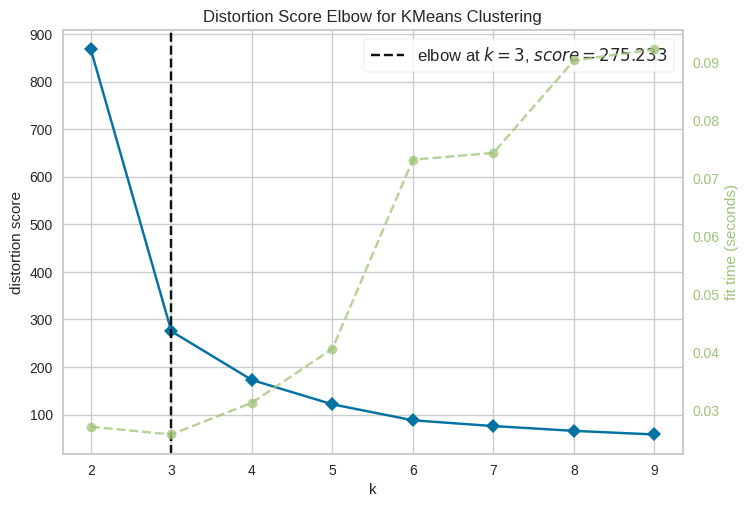

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [168]:
kmeans = KMeans(init='k-means++', max_iter=500, n_init=10, random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2, 10))

visualizer.fit(df)
visualizer.show()

In [169]:
optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=1000, n_init=10, random_state=42)
kmeans.fit_predict(df)

kmeans_labels = kmeans.labels_

## **b. Evaluasi Model Clustering**

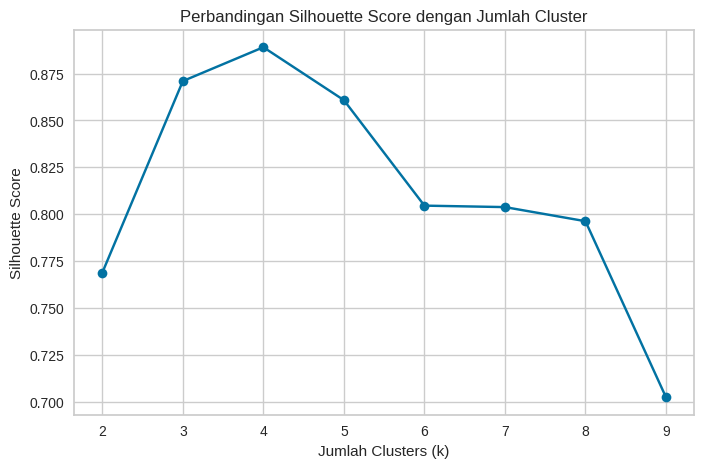

In [170]:
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker="o", linestyle="-")
plt.xlabel("Jumlah Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Perbandingan Silhouette Score dengan Jumlah Cluster")
plt.show()

In [171]:
# evaluasi model kmeans dengan n_cluster = 3
kmeans_sil_score = silhouette_score(df, kmeans_labels)
print(f"Kmeans Silhouette Score dengan {optimal_k} cluster : {kmeans_sil_score}")

Kmeans Silhouette Score dengan 3 cluster : 0.8709767859899736


## **c. Feature Selection (Opsional)**

In [172]:
df_selected = df.copy()

In [173]:
# disini saya akan men-drop column status_link karena variasinya yang sedikit
df_selected = df.drop(columns = 'status_type_link', axis=1)

In [174]:
cols = np.array(df_selected.columns)

In [175]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(df_selected, kmeans_labels)
rf_importance = rf.feature_importances_

mi_scores = mutual_info_classif(df_selected, kmeans_labels, discrete_features=False)

# Kombinasi skor RF & MI
feature_scores = (rf_importance + mi_scores) / 2
sorted_idx = np.argsort(feature_scores)[::-1]  # Urutkan dari skor tertinggi

# Pilih 5 fitur terbaik
top_n = 10
important_features = [cols[i] for i in sorted_idx[:top_n]]

print("Fitur Terpilih berdasarkan Feature Selection:", important_features)

Fitur Terpilih berdasarkan Feature Selection: ['status_type_photo', 'status_type_video', 'status_type_status', 'num_shares', 'num_loves', 'num_comments', 'num_hahas', 'num_reactions', 'num_likes', 'num_angrys']


In [176]:
df_selected = df_selected[important_features]

In [177]:
# PCA with 95% variance
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(df_selected)
principalDf = pd.DataFrame(data = principalComponents)

In [178]:
principalDf

,0,1,2,3,4
0,-0.829102,-0.117184,0.055723,0.055383,-0.000398
1,0.592610,-0.074575,-0.031262,0.001672,0.003908
2,-0.820745,-0.116415,-0.040587,-0.046381,0.011129
3,0.592809,-0.075143,-0.042827,0.003370,0.003708
4,0.591685,-0.074137,-0.012209,0.009483,0.003033
...,...,...,...,...,...
4982,0.592936,-0.075508,-0.050241,0.004459,0.003579
4983,0.592921,-0.075464,-0.049351,0.004329,0.003595
4984,0.593175,-0.076631,-0.070910,0.009899,0.002940
4985,0.593298,-0.076786,-0.075111,0.009291,0.003015


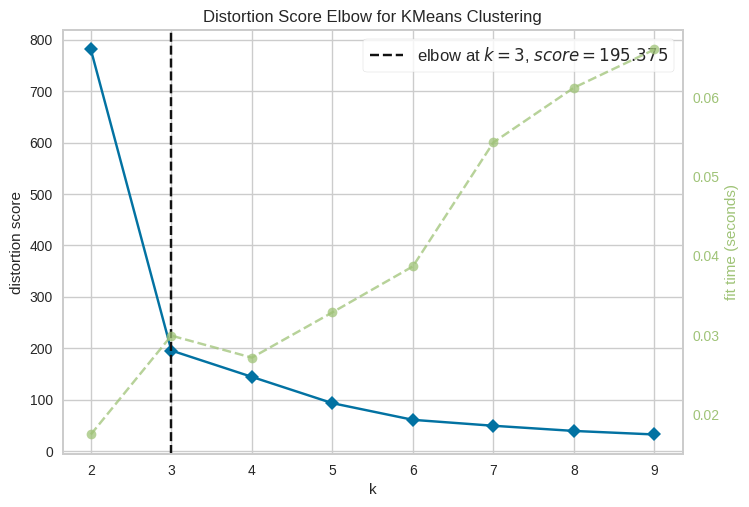

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [179]:
kmeans = KMeans(init='k-means++', max_iter=500, n_init=10, random_state=42)

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(2, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(principalDf)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [180]:
optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=1000, n_init=10, random_state=42)
kmeans.fit_predict(principalDf)

# Mendapatkan label cluster
kmeans_labels = kmeans.labels_

In [181]:
# evaluasi model kmeans dengan n_cluster = optimal_k
kmeans_sil_score = silhouette_score(principalDf, kmeans_labels)
print(f"Kmeans with {optimal_k} cluster Silhouette Score: {kmeans_sil_score}")

Kmeans with 3 cluster Silhouette Score: 0.8825394935786102


setelah dilakukan PCA pada data dengan mempertahankan 95% dari total variance, didapatkan kenaikan silhoutte score menjadi 88%

## **d. Visualisasi Hasil Clustering**

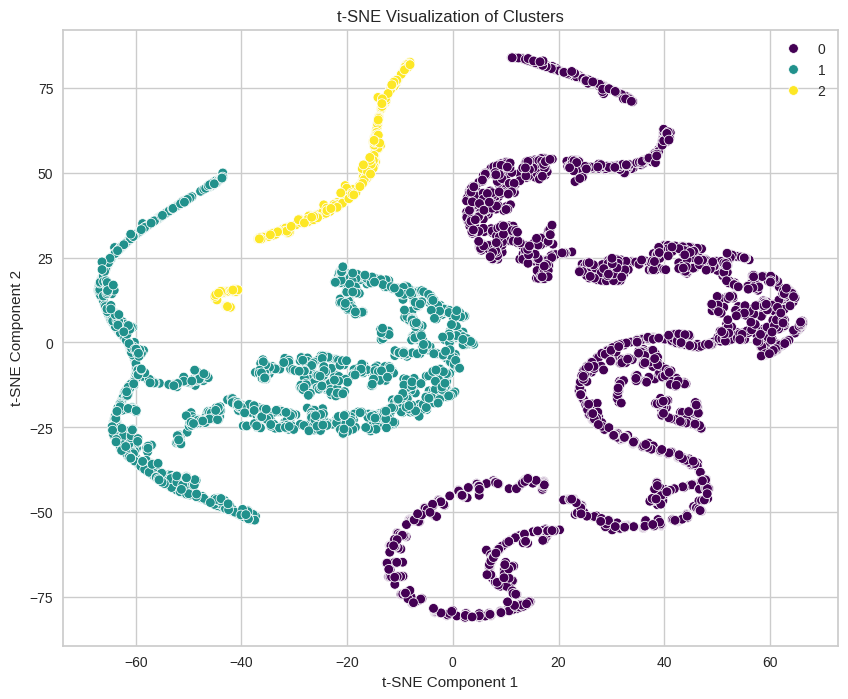

In [182]:
# Inisialisasi t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Fit dan transform data hasil PCA
tsne_result = tsne.fit_transform(principalDf)

# Buat scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=kmeans_labels, palette="viridis")
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

In [207]:
df_result = df.copy()
df_result

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video,Cluster
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0,1
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0,1
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,0.018259,0.000000,0.000000,0.018259,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,0.0,1.0,0.0,0.0,0
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0


In [208]:
df_result[numerical_cols] = scaler.inverse_transform(df_result[numerical_cols])

In [209]:
df_result = df_result[important_features]

In [210]:
df_result

,status_type_photo,status_type_video,status_type_status,num_shares,num_loves,num_comments,num_hahas,num_reactions,num_likes,num_angrys
0,0.0,1.0,0.0,262.0,92.0,512.0,1.0,529.0,432.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,150.0,0.0
2,0.0,1.0,0.0,57.0,21.0,236.0,1.0,227.0,204.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,111.0,111.0,0.0
4,1.0,0.0,0.0,0.0,9.0,0.0,0.0,213.0,204.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7044,1.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0,86.0,0.0
7045,1.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0,89.0,0.0
7046,1.0,0.0,0.0,0.0,1.0,0.0,1.0,16.0,14.0,0.0
7047,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0


In [211]:
df_result['status_type'] = np.nan

for index, row in df_result.iterrows():
  if row['status_type_photo'] == 1:
    df_result.loc[index, 'status_type'] = 'photo'
  elif row['status_type_status'] == 1:
    df_result.loc[index, 'status_type'] = 'status'
  elif row['status_type_video'] == 1:
    df_result.loc[index, 'status_type'] = 'video'
  else:
    df_result.loc[index, 'status_type'] = 'link'

df_result = df_result.drop(['status_type_photo', 'status_type_status', 'status_type_video'], axis=1)

In [212]:
df_result

,num_shares,num_loves,num_comments,num_hahas,num_reactions,num_likes,num_angrys,status_type
0,262.0,92.0,512.0,1.0,529.0,432.0,0.0,video
1,0.0,0.0,0.0,0.0,150.0,150.0,0.0,photo
2,57.0,21.0,236.0,1.0,227.0,204.0,0.0,video
3,0.0,0.0,0.0,0.0,111.0,111.0,0.0,photo
4,0.0,9.0,0.0,0.0,213.0,204.0,0.0,photo
...,...,...,...,...,...,...,...,...
7044,0.0,0.0,0.0,0.0,86.0,86.0,0.0,photo
7045,0.0,0.0,0.0,0.0,89.0,89.0,0.0,photo
7046,0.0,1.0,0.0,1.0,16.0,14.0,0.0,photo
7047,0.0,1.0,0.0,0.0,2.0,1.0,0.0,photo


In [218]:
scaled_columns = ['num_shares', 'num_comments', 'num_loves', 'num_hahas', 'num_reactions', 'num_likes', 'num_angrys']

In [215]:
df_result['Cluster'] = kmeans_labels

In [219]:
cluster_summary_num = df_result.groupby("Cluster")[scaled_columns].mean()
cluster_summary_cat = df_result.groupby("Cluster")[["status_type"]].agg(lambda x: x.mode()[0])
cluster_summary = pd.concat([cluster_summary_num, cluster_summary_cat], axis=1)
cluster_summary

,num_shares,num_comments,num_loves,num_hahas,num_reactions,num_likes,num_angrys,status_type
Cluster,,,,,,,,
0,3.838936,23.626893,2.101588,0.292575,260.171407,256.546361,0.062431,photo
1,144.437132,802.302836,44.367041,2.166934,352.414125,301.987159,0.317282,video
2,2.922141,32.693431,1.377129,0.102190,440.085158,437.218978,0.021898,status


In [220]:
print(df_result.groupby("Cluster")['status_type'].value_counts(normalize=True) * 100)

Cluster  status_type
0        photo          100.00000
1        video          100.00000
2        status          85.40146
         link            14.59854
Name: proportion, dtype: float64


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata num_reactions:** 260.171407
- **Rata-rata num_comments	:** 23.626893
- **Rata-rata num_shares	:** 3.838936
- **Rata-rata num_likes	:** 256.546361
- **Rata-rata num_loves	:** 2.101588
- **Rata-rata num_wows	:** 0.965645
- **Rata-rata num_hahas	:** 0.292575
- **Rata-rata num_sads	:** 0.198005
- **Rata-rata num_angrys	:** 0.062431
- ** Status_Type : ** Photo(100%)
- **Analisis:** Cluster ini mencakup pages dengan status type photo. Pages dalam cluster ini cenderung mendapatkan jumlah reaction dan Likes yang tinggi dan jumlah comment yang moderat.

## Cluster 1:

- **Rata-rata num_reactions:** 352.414125
- **Rata-rata num_comments	:** 802.302836
- **Rata-rata num_shares	:** 144.437132
- **Rata-rata num_likes	:** 301.987159
- **Rata-rata num_loves	:** 44.367041
- **Rata-rata num_wows	:** 3.055645
- **Rata-rata num_hahas	:** 2.166934
- **Rata-rata num_sads	:** 0.516854
- **Rata-rata num_angrys	:** 0.317282
- ** Status_Type : ** video(100%)
- **Analisis:** Cluster ini mencakup pages dengan status type video. Pages dalam cluster ini cenderung mendapatkan jumlah reaction dan Likes yang tinggi, jumlah comment yang tinggi, serta jumlah share yang tinggi, serta jumlah loves yang moderat.

## Cluster 2:

- **Rata-rata num_reactions:** 440.085158
- **Rata-rata num_comments	:** 32.693431
- **Rata-rata num_shares	:** 2.922141
- **Rata-rata num_likes	:** 437.218978
- **Rata-rata num_loves	:** 1.377129
- **Rata-rata num_wows	:** 1.058394
- **Rata-rata num_hahas	:** 0.102190
- **Rata-rata num_sads	:** 0.306569
- **Rata-rata num_angrys	:** 0.021898
- ** Status_Type : ** status(85%) , link(15%)  
- **Analisis:** Cluster ini mencakup pages dengan status type status. Pages dalam cluster ini cenderung mendapatkan jumlah reaction dan Likes yang tinggi, namun mendapat jumlah komen, shares yang sedikit.

# **7. Export Data**



In [ ]:
df_selected.to_csv("facebook_live_sellers_in_thailand_clustered.csv", index=False)